# **Topic Modeling**
##(1) K means clustering
#### To check How Bad the clustering is at topic modeling.


# 0. Read Datasets

In [ ]:
# Import the necessary libraries

import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd

data = pd.read_csv('/Users/leahshin/Documents/myProject/hotel_review_newregion.csv')

In [ ]:
data.head()

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Tags_list,name,region,sub_region
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,8/3/17,7.7,Hotel Arena,Russia,I am so angry that i made this post available ...,397,1403,...,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Russia,Europe,Eastern Europe
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,8/3/17,7.7,Hotel Arena,Ireland,NaN,0,1403,...,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Ireland,Europe,Northern Europe
2,2,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,7/31/17,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficult...,42,1403,...,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,"[' Leisure trip ', ' Family with young childre...",Australia,Oceania,Australia and New Zealand
3,3,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,7/31/17,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk bar...,210,1403,...,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",United Kingdom,Europe,Northern Europe
4,4,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,7/24/17,7.7,Hotel Arena,New Zealand,You When I booked with your company on line yo...,140,1403,...,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",New Zealand,Oceania,Australia and New Zealand


In [ ]:
set(data.region)

{'Africa', 'Americas', 'Antarctica', 'Asia', 'Europe', 'Oceania'}

In [ ]:
set(data.sub_region)

{'Antarctica',
 'Australia and New Zealand',
 'Central Asia',
 'Eastern Africa',
 'Eastern Asia',
 'Eastern Europe',
 'Latin America and the Caribbean',
 'Melanesia',
 'Micronesia',
 'Middle Africa',
 'Northern Africa',
 'Northern America',
 'Northern Europe',
 'Polynesia',
 'South-eastern Asia',
 'Southern Africa',
 'Southern Asia',
 'Southern Europe',
 'Western Africa',
 'Western Asia',
 'Western Europe'}

In [ ]:
# check all columns
data.columns.values

array(['Unnamed: 0', 'Hotel_Address', 'Additional_Number_of_Scoring',
       'Review_Date', 'Average_Score', 'Hotel_Name',
       'Reviewer_Nationality', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Tags', 'days_since_review', 'lat', 'lng', 'Tags_list', 'name',
       'region', 'sub_region'], dtype=object)

In [ ]:
# Merge both reviews into one column
data['Merged_Review'] = data['Negative_Review'] + " " + data['Positive_Review']

# 1. Text Preprocessing

In [ ]:
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leahshin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Define a function to preprocess text (including sentimental words removal)

stop_words = set(stopwords.words('english'))
stop_words_nouns = ["hotel", "place", "room", "5", "4", "3", "2", "1", "wa", "u", "one", "two", "everything", "nothing", "thing"]
stop_words_verbs = ["enjoy", "would", "like", "could", "get", "stay", "visit", "go", "think", "make"]
stop_words_adverbs = ["highly", "within", "really", "well", "even", "though", "bit", "little", "extremely",
                 "definitely", "much", "also", "always", "never", "often", "usually"]
stop_words_adjectives =["great", "positive", "negative", "good", "nice", "lovely", "fantastic", "excellent",
                 "amazing", "wonderful", "horrible", "terrible", "disappointing", "awful", "poor", "super"]

# Not Included: "spacious", "friendly", "helpful", "room", "close", "staff", "experience"

# Merge all custom stopwords lists
all_stopwords = list(stop_words.union(set(stop_words_nouns)))
all_stopwords += stop_words_verbs + stop_words_adverbs + stop_words_adjectives

# Convert the custom stopwords list to a set for faster membership checking
all_stopwords = set(all_stopwords)


In [ ]:
def preprocess_text(text):
    if isinstance(text, str):
        # Remove punctuation and convert to lowercase
        text = text.translate(str.maketrans('', '', string.punctuation)).lower()
        # Tokenize the text
        tokens = word_tokenize(text)

        # Lemmatize the tokens
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

        # Remove stopwords
        filtered_tokens = [word for word in lemmatized_tokens if word not in all_stopwords]
        return filtered_tokens
    else:
        # Handle non-string values (e.g., float) gracefully by returning an empty list
        return []

# Apply text preprocessing to the merged reviews
data['Merged_Review'] = data['Merged_Review'].apply(preprocess_text)

In [ ]:
data['Merged_Review'][0:5]

0    [angry, made, post, available, via, possible, ...
1                                                   []
2    [elderly, difficult, story, narrow, step, ask,...
3    [dirty, afraid, walk, barefoot, floor, looked,...
4    [booked, company, line, showed, picture, thoug...
Name: Merged_Review, dtype: object

# 2. Topic Analysis
## TF-IDF Vectorization:
Convert the text data into TF-IDF vectors, which represent the importance of words in each review.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# First, ensure that each entry in 'Merged_Review' is a list of words (tokens)
data['Merged_Review'] = data['Merged_Review'].apply(lambda x: x if isinstance(x, list) else [])

# Join the tokens back into a single string for each document
data['Merged_Review'] = data['Merged_Review'].apply(lambda tokens: ' '.join(tokens))

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the merged reviews using TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Merged_Review'])


## Kmeans

Determining the appropriate number of clusters, often denoted as 'K', is an important aspect of using clustering algorithms like K-means. There are several methods you can use to decide the optimal number of clusters for your specific dataset. Here are some common techniques:

**Elbow Method**:
The Elbow Method involves running K-means clustering for a range of K values and plotting the sum of squared distances (inertia) for each K. You look for the point where the inertia starts to level off, forming an "elbow" in the plot. This is a good indicator of the optimal number of clusters.

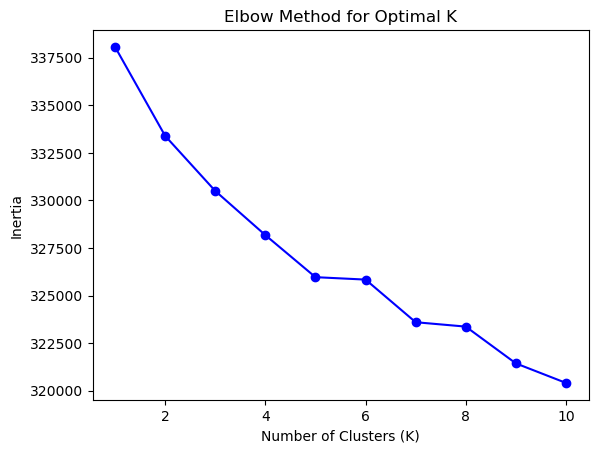

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a list to store inertias
inertias = []

# Test different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), inertias, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


\
### First of all, we will check with number 5 which was our candidate ideal topic number. We will do with the optimal number 4 later on.

In [ ]:
from sklearn.cluster import KMeans

# Choose the number of clusters (K)
num_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster_1'] = kmeans.fit_predict(tfidf_matrix)


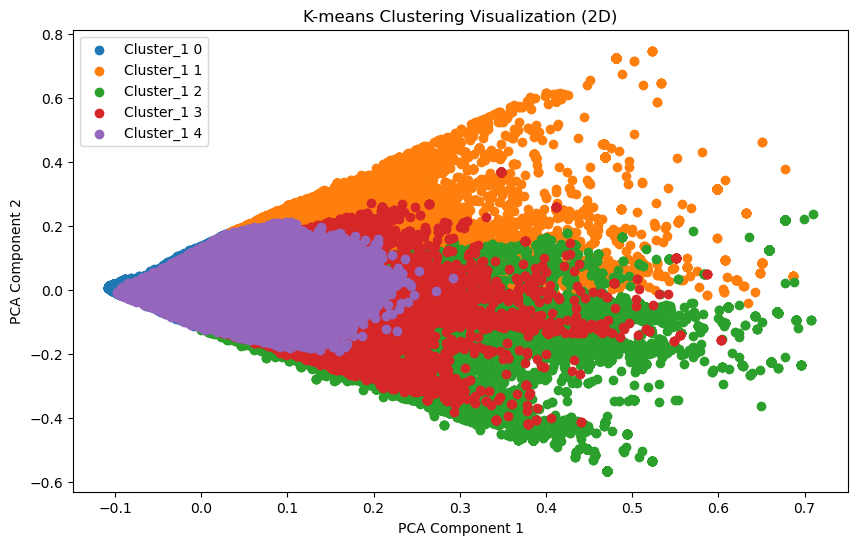

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())

# Add the cluster labels to the data
data['Cluster_1'] = kmeans.labels_

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(tfidf_2d[data['Cluster_1'] == cluster, 0], tfidf_2d[data['Cluster_1'] == cluster, 1], label=f'Cluster_1 {cluster}')

plt.legend()
plt.title('K-means Clustering Visualization (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


\
### Also, check with the optimal number 4 from the elbow methods.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Choose the number of clusters (K)
num_clusters_2 = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters_2, random_state=42)
data['Cluster_2'] = kmeans.fit_predict(tfidf_matrix)



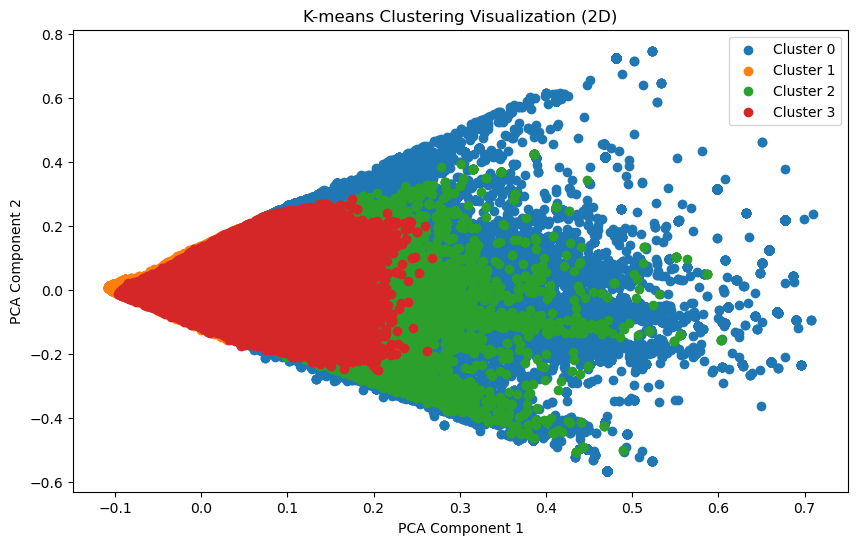

In [ ]:
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())

# Add the cluster labels to the data
data['Cluster_2'] = kmeans.labels_

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters_2):
    plt.scatter(tfidf_2d[data['Cluster_2'] == cluster, 0],
                tfidf_2d[data['Cluster_2'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.legend()
plt.title('K-means Clustering Visualization (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Check word clouds from each clusters

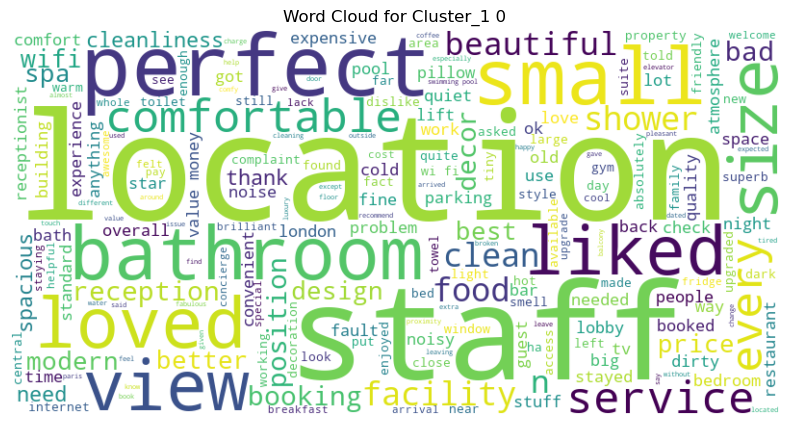

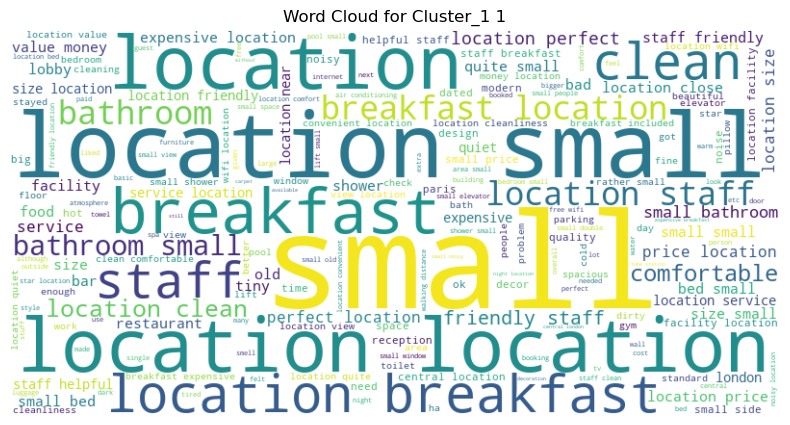

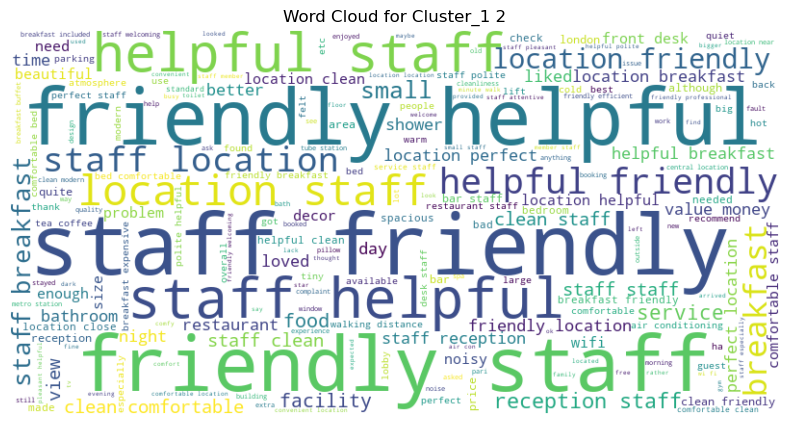

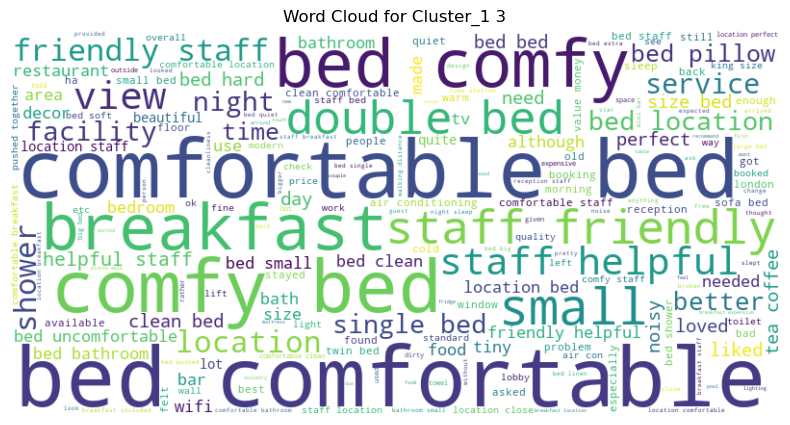

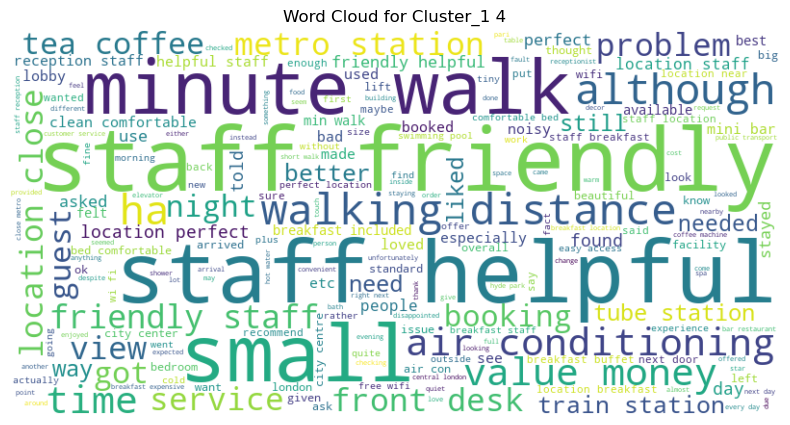

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word clouds
def generate_word_cloud(cluster_df, cluster_name):
    text = ' '.join(cluster_df['Merged_Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {cluster_name}')
    plt.axis('off')
    plt.show()

# Generate word clouds for Cluster_1 / Ideal candidate number 5
for cluster in range(num_clusters):
    cluster_df = data[data['Cluster_1'] == cluster]
    cluster_name = f'Cluster_1 {cluster}'
    generate_word_cloud(cluster_df, cluster_name)


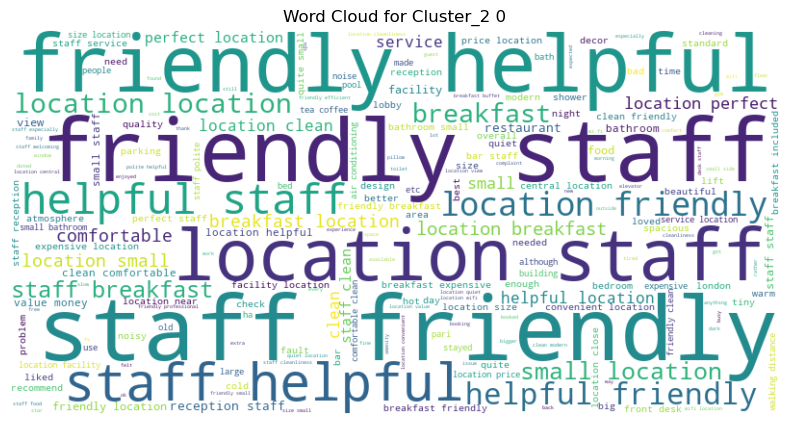

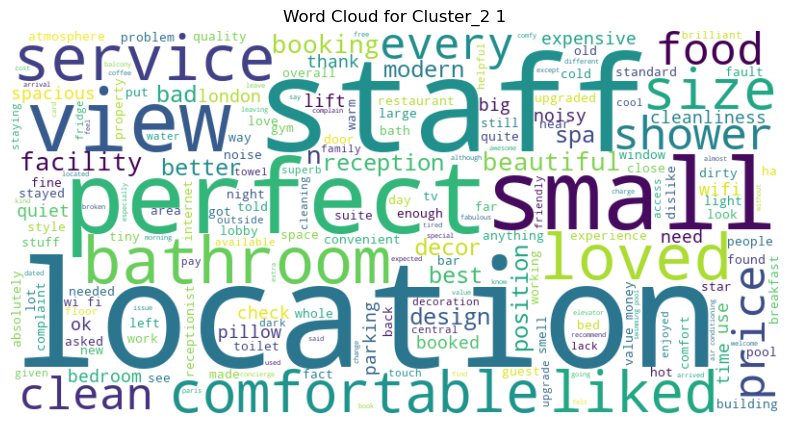

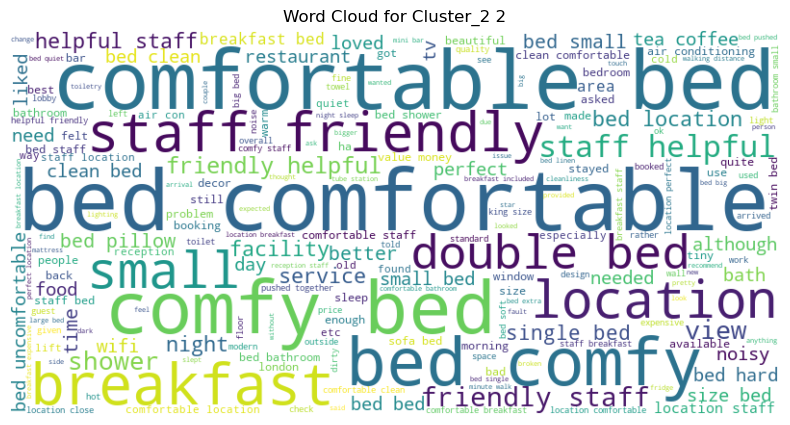

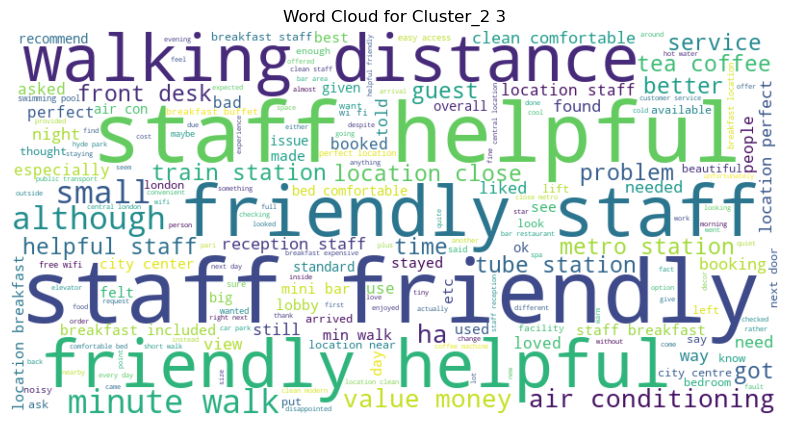

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
# Generate word clouds for Cluster_2 / Optimal k 4
for cluster in range(num_clusters):
    cluster_df = data[data['Cluster_2'] == cluster]
    cluster_name = f'Cluster_2 {cluster}'
    generate_word_cloud(cluster_df, cluster_name)

\
### After running some trials of codesets, we can check that cluster is really not ideal type of modeling topics. The clustering is just to confirm **HoW BaD iT Is?**, so we will move on to the next methodology, TF-IDF.